In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

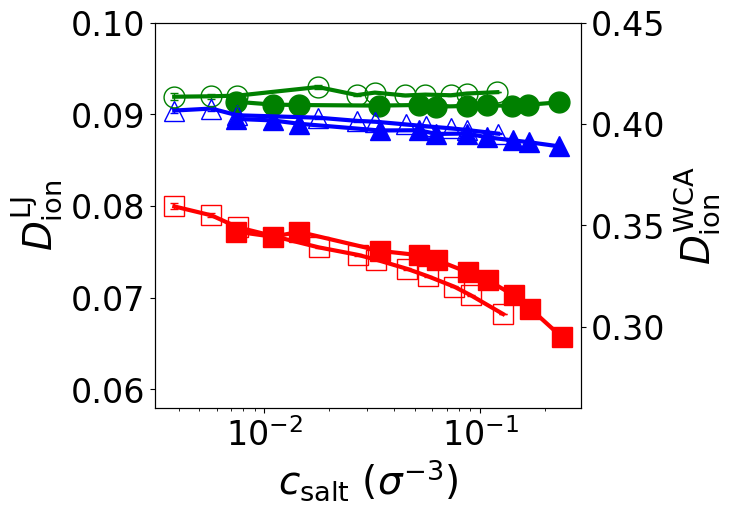

In [2]:
# ---------- Load Data ---------- #   # ← diffusion 데이터
file_path = "./"
concentrate_file = "concentrate_volume.csv"
concentrate_data = pd.read_csv(concentrate_file)
for col in concentrate_data.columns:
    globals()[col] = concentrate_data[col].dropna().to_numpy()

# ---------- Compute averaged D + error propagation ---------- #
def avg_with_error(cat, ani, cat_err, ani_err):
    D_mean = 0.5 * (cat + ani)
    D_err = 0.5 * np.sqrt(cat_err**2 + ani_err**2)
    return D_mean, D_err

def load_dpp_dmm(eps, model):
    fname = f"{file_path}Diffusion_fit_MD_{eps}_{model}.csv"
    df = pd.read_csv(fname)

    D_cat = df["Dpp"].values          # D++
    D_cat_err = df["Dpp_err"].values
    D_ani = df["Dmm"].values          # D--
    D_ani_err = df["Dmm_err"].values

    return D_cat, D_cat_err, D_ani, D_ani_err

# ---------- Plot (same style as saved template) ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax1 = plt.subplots(figsize=(5.5, 5))
ax2 = ax1.twinx()
# ---------- LJ (filled markers) ----------
for eps in ['0.2', '1', '5']:
    if eps=="0.2":
        eps_temp = "02"
    else:
        eps_temp = eps
    x = f"mean_c_salt_{eps_temp}_lj"
    x = globals()[x]    
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "LJ")
    key = eps.replace('.', '')
    D_mean, D_err = avg_with_error(D_cat, D_ani, D_cat_err, D_ani_err)
    ax1.plot(x, D_mean, color = color_map[eps], linestyle="-", linewidth=3, alpha=1)
    ax1.errorbar(
        x, D_mean, yerr=D_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc=color_map[eps], mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} LJ"
    )

# ---------- WCA (open markers) ----------
for eps in ['0.2', '1', '5']:
    if eps=="0.2":
        eps_temp = "02"
    else:
        eps_temp = eps
    x = f"mean_c_salt_{eps_temp}_wca"
    x = globals()[x]    
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "WCA")
    key = eps.replace('.', '')
    D_mean, D_err = avg_with_error(D_cat, D_ani, D_cat_err, D_ani_err)
    ax2.plot(x, D_mean, color = color_map[eps], linestyle="-", linewidth=3, alpha=1)
    ax2.errorbar(
        x, D_mean, yerr=D_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc='none', mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} WCA"
    )

# ---------- Axes ----------
ax1.set_xlabel(r'$c_{\mathrm{salt}}$ $(\sigma^{-3})$', fontsize=28)
ax1.set_ylabel(r'$D_{\mathrm{ion}}^{\mathrm{LJ}}$', fontsize=28)
ax2.set_ylabel(r'$D_{\mathrm{ion}}^{\mathrm{WCA}}$', fontsize=28)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax1.set_xscale("log")

# ---------- Legend ----------
ax1.set_ylim(0.058, 0.1)
ax2.set_ylim(0.26, 0.45)
# plt.tight_layout()
plt.show()